In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random
import pickle
from scipy import stats
import time


# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *
from max_ent.gridworld import Directions


random.seed(123)
np.random.seed(123)

In [2]:
n_trials = 10 #

n_trajectories = 1000

bootstrap = 0

threshold1 = 100 # {10, 50, 100, 200, 300} default 200
threshold2 = 0.8 # {0, 0.2, 0.4, 0.6, 0.8, 1} default 0.5
threshold3 = 0.4 # {0, 0.2, 0.4, 0.6, 0.8, 1} default 0.5
threshold4 = 0 # {0, 0.2, 0.4, 0.6, 0.8, 1} default 0.5
threshold5 = 0 # means default w=[1,0]
threshold7 = 0.5 # {0, 0.2, 0.4, 0.6, 0.8, 1} default 0.5

df = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df7 = pd.DataFrame()

In [3]:
def compute_mean(target = None):

    df = pd.DataFrame()

    if target: 

        for i in range(0, len(target.time_stat)):
            #print(f"Stat: {mca.trajectory_stat[i]}")
            mask_1 = np.array(target.trajectory_stat[i]) == 1
            mask_2 = np.array(target.trajectory_stat[i]) == 0
            
            #Creaty np array from time array
            selected = np.array(target.time_stat[i])
            #Select actions in trajectory based on which system computed them
            selected_1= selected[mask_1]
            selected_2= selected[mask_2]
            #Compute total time per solver
            time_s1 = np.sum(selected_1)
            time_s2 = np.sum(selected_2)
            
            #Creaty np array from trajectory array
            selected = np.array(target.trajectory_stat[i])
            #Select builder in trajectory based on which system computed them
            selected_1= selected[mask_1]
            selected_2= selected[mask_2]
            #Compute total time per solver
            usage_s1 = np.sum(selected_1)
            usage_s2 = len(target.trajectory_stat[i]) - np.sum(selected_1)
            
            #Creaty np array from trajectory array
            selected = np.array(target.action_reward[i])
            #Select builder in trajectory based on which system computed them
            selected_1= selected[mask_1]
            selected_2= selected[mask_2]
            #Compute total time per solver
            reward_s1 = np.sum(selected_1)
            reward_s2 = np.sum(selected_2)
            

            dict_mca = {}
            dict_mca['traj_n'] = i
            dict_mca['length'] = len(target.trajectory_stat[i])
            dict_mca['reward'] = np.sum(target.action_reward[i])
            dict_mca['time'] = np.sum(target.time_stat[i])
            
            dict_mca['sub_type'] = "s1"
            dict_mca['time_agent'] = time_s1
            dict_mca['avg_time'] = time_s1 / usage_s1
            dict_mca['reward_agent'] = reward_s1
            dict_mca['avg_reward'] = reward_s1 / usage_s1
            dict_mca['usage']= usage_s1
            dict_mca['perc_usage']= usage_s1 / len(target.trajectory_stat[i])
            temp_df = pd.DataFrame(data=dict_mca, index=[i])
            df = pd.concat([df, temp_df])
            
            
            dict_mca = {}
            dict_mca['traj_n'] = i
            dict_mca['length'] = len(target.trajectory_stat[i])
            dict_mca['reward'] = np.sum(target.action_reward[i])
            dict_mca['time'] = np.sum(target.time_stat[i])
            
            dict_mca['sub_type'] = "s2"
            dict_mca['time_agent'] = time_s2
            dict_mca['avg_time'] = time_s2 / usage_s2
            dict_mca['reward_agent'] = reward_s2
            dict_mca['avg_reward'] = reward_s2 / usage_s2
            dict_mca['usage']= usage_s2
            dict_mca['perc_usage']= usage_s2 / len(target.trajectory_stat[i])
            
            temp_df = pd.DataFrame(data=dict_mca, index=[i])
            df = pd.concat([df, temp_df])
            
    else:
        dict_mca = {}
        dict_mca['traj_n'] = 0
        dict_mca['length'] = 0
        dict_mca['reward'] = 0
        dict_mca['time'] = 0

        dict_mca['sub_type'] = "null"
        dict_mca['time_agent'] = 0
        dict_mca['avg_time'] = 0 
        dict_mca['reward_agent'] = 0
        dict_mca['avg_reward'] = 0 
        dict_mca['usage']= 0
            
        temp_df = pd.DataFrame(data=dict_mca, index=[0])
        df = pd.concat([df, temp_df])

    
    #print(dict_mca)
    
    return df

In [4]:
def plot_results(df, x, y, min_label, max_label, bootstrap = bootstrap):
    
    #print(df)

    '''#print(f"RL\t -> Length: {np.mean(df.loc[(df['type']=='const')]['Length'].values):8.4f} \t Rew: {np.mean(df.loc[(df['type']=='const')]['Reward'].values):10.4f} \t Viol.: {np.mean(df.loc[(df['type']=='const')]['Viol'].values)}")    
    print_results(df.loc[(df['type']=='const')], 'RL')
    print_results(df.loc[(df['type']=='10')& (df['traj_n']>=bootstrap)& (df['t4']==0)], 'MCA_10')
    print_results(df.loc[(df['type']=='01')& (df['traj_n']>=bootstrap)& (df['t4']==0)], 'MCA_01')
    print_results(df.loc[(df['type']=='02')& (df['traj_n']>=bootstrap)& (df['t4']==0)], 'MCA_55')
    print_results(df.loc[(df['type']=='s1')& (df['traj_n']>=bootstrap)], 'MCA_s1')
    #print_results(df.loc[(df['type']=='s1_nb') & (df['t1']==200)], 'MCA_nb')
    print_results(df.loc[(df['type']=='s2')& (df['traj_n']>=bootstrap)], 'MCA_s2')'''
    
    '''print(f"MCA 10\t -> Length: {np.mean(df.loc[(df['type']=='10') & (df['t1']==200)]['Length'].values):8.4f} \t Rew: {np.mean(df.loc[(df['type']=='10') & (df['t1']==200)]['Reward'].values):10.4f} \t Viol.: {np.mean(df.loc[(df['type']=='10') & (df['t1']==200)]['Viol'].values)}")
    print(f"MCA 01\t -> Length: {np.mean(df.loc[(df['type']=='01') & (df['t1']==200)]['Length'].values):8.4f} \t Rew: {np.mean(df.loc[(df['type']=='01') & (df['t1']==200)]['Reward'].values):10.4f} \t Viol.: {np.mean(df.loc[(df['type']=='01') & (df['t1']==200)]['Viol'].values)}")
    print(f"MCA 55\t -> Length: {np.mean(df.loc[(df['type']=='02') & (df['t1']==200)]['Length'].values):8.4f} \t Rew: {np.mean(df.loc[(df['type']=='02') & (df['t1']==200)]['Reward'].values):10.4f} \t Viol.: {np.mean(df.loc[(df['type']=='02') & (df['t1']==200)]['Viol'].values)}")
    print(f"Only S1\t -> Length: {np.mean(df.loc[(df['type']=='s1')]['Length'].values):8.4f} \t Rew: {np.mean(df.loc[(df['type']=='s1')]['Reward'].values):10.4f} \t Viol.: {np.mean(df.loc[(df['type']=='s1')]['Viol'].values)}")
    print(f"Only S2\t -> Length: {np.mean(df.loc[(df['type']=='s2')]['Length'].values):8.4f} \t Rew: {np.mean(df.loc[(df['type']=='s2')]['Reward'].values):10.4f} \t Viol.: {np.mean(df.loc[(df['type']=='s2')]['Viol'].values)}")'''
    
    fig=plt.figure(figsize=(12, 7))
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="whitegrid")
    sns.set(font_scale=2)
    sns.color_palette("viridis", as_cmap=True)
    temp_df = df.loc[(df['type']!="mixed") & (df['type']!="s1_nb")&(df['type']!="const")&(df['type']!="nominal")& (df['type']!="s1") & (df['type']!="s2")& (df['traj_n']>=bootstrap)]
    print("Prima")
    #g=sns.lineplot(x=x, y=y, data=df, hue="type",markers=True, dashes=False)
    g = sns.barplot(x=x, y=y, hue="type", data=temp_df, palette="autumn", ci=95);
    print("Dopo")
    #g.set_xticklabels([f"({(i)/10:0.1f}, {1 - (i)/10:0.1f})" for i in range(11)])
    
    constrained_line = np.mean(df.loc[(df['type']=="const")][y])
    nominal_line = np.mean(df.loc[(df['type']=="nominal")][y])
    print(f"constrained_line: {constrained_line} {y}")
    print(f"nominal_line: {nominal_line} {y}")
    #s1_line = np.mean(df.loc[(df['type']=="s1")& (df['traj_n']>=bootstrap)][y])
    s2_line = np.mean(df.loc[(df['type']=="s2")& (df['traj_n']>=0)][y])
    #mixed_line = np.median(temp_df.loc[(temp_df['type']=="mixed")& (temp_df['traj_n']>=bootstrap)][y])
    s1nb_line = np.mean(df.loc[(df['type']=="s1_nb")& (df['traj_n']>=0)][y])
    
    print(f"s2: {s2_line} s1:{s1nb_line}")
    
    g.axhline(constrained_line, color='r', linestyle='--', label="RL Constrained")
    g.axhline(nominal_line, color='b', linestyle='--', label="RL Nominal")
    #g.axhline(s1_line, color='b', linestyle='--', label="S1")
    #g.axhline(mixed_line, color='g', linestyle='--', label="Mixed")
    g.axhline(s1nb_line, color='b', linestyle='-.', label="S1")
    g.axhline(s2_line, color='g', linestyle='-.', label="S2")
    #g.set_ylim([min_label, max_label])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.title(label=y+" varying "+x)
    
    '''h, l = g.get_legend_handles_labels()
    labels=["S1", "S2","SOFAI 10","SOFAI 01","SOFAI 02"]
    g.legend(h, labels)'''
    plt.legend()
    plt.grid(alpha=0.3)
    #g.set_xticks(range(11)) # <--- set the ticks first

    #plt.xlabel("W(Nominal, Constraints)")
    #plt.ylabel("Avg JS dist")
    plt.show()
    fig.savefig(os.path.join("./", f"{y}_varying_{x}.png"), bbox_inches = 'tight')

In [5]:
from mc.self import *
from mc.system1 import *
from mc.system2 import *
from mc.mca import *

def build_dict(temp_matrix, type_mca, agent=None, s1_usage=0,  t1=200, t2=0.8, t3=0, t4=0, t6=1, t7=0.5, bootstrap=0):
    '''temp_dict={}
    temp_dict['type']= type_mca
    temp_dict['Length']= temp_matrix[1]
    temp_dict['Reward']= temp_matrix[2]
    temp_dict['Viol'] = temp_matrix[4]
    temp_dict['S1_Usage'] = s1_usage
    temp_dict['t1'] = t1
    temp_dict['t2'] = t2
    temp_dict['t3'] = t3
    temp_dict['t4'] = t4
    temp_dict['t6'] = t6
    temp_dict['t7'] = t7
    temp_df = pd.DataFrame(data=temp_dict, index=[0])'''
    
    temp_df = compute_mean(agent)
    temp_df['type']= type_mca
    temp_df['Length']= temp_matrix[1]
    if agent == None: temp_df['length']= temp_matrix[1]
    temp_df['Reward']= temp_matrix[2]
    if agent == None: temp_df['reward']= temp_matrix[2]
    temp_df['Viol'] = temp_matrix[4]
    temp_df['S1_Usage'] = s1_usage
    temp_df['t1'] = t1
    temp_df['t2'] = t2
    temp_df['t3'] = t3
    temp_df['t4'] = t4
    temp_df['t6'] = t6
    temp_df['t7'] = t7
    
    return temp_df
    

def simulation(n_cfg, c_cfg, demo, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories=200, 
               threshold1 = 200, threshold2 = 0.8, threshold3 = 0.4, 
               threshold4 = 0, threshold6 = 1, threshold7 = 0.5, df=None, jsdiv =None, bootstrap = 0):
    
    if df is None:
        df = pd.DataFrame()
        
    if jsdiv is None:
        jsdiv = pd.DataFrame()
   
    n=n_cfg.mdp
    c=c_cfg.mdp
    
    '''temp_matrix = count_states(demo.trajectories, c_cfg.mdp, n, constraints)
    temp_dict=build_dict(temp_matrix, type_mca='const')
    df = pd.concat([df, temp_dict])

    #mca_s1 = MCA(n=n, c=c, demo=demo, only_s1=True)
    #demo_mca_s1 = mca_s1.generate_trajectories(n_trajectories)
    temp_matrix_mca_s1 = count_states(demo_mca_s1.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_s1, type_mca='s1', agent=mca_s1, s1_usage=mca_s1.getStatistics()[0])
    df = pd.concat([df, temp_dict])

    #mca_s2 = MCA(n=n, c=c, demo=demo, only_s2=True)
    #demo_mca_s2 = mca_s2.generate_trajectories(n_trajectories)
    temp_matrix_mca_s2 = count_states(demo_mca_s2.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_s2, type_mca='s2', agent=mca_s2 )
    df = pd.concat([df, temp_dict])'''
    
    #for t3 in threshold3:
    #    for t4 in threshold4:
    #print(f"t1:{t1} t2:{t2} t3:{t3} t4:{t4} t6:{t6} t7:{t7} ")

    mca_10 = MCA(n=n, c=c, demo=None, threshold1 = threshold1,  threshold3 = threshold3, threshold4 = threshold4, threshold5 = 0)
    demo_mca_10 = mca_10.generate_trajectories(n_trajectories)
    temp_matrix_mca_10 = count_states(demo_mca_10.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_10, type_mca='10', agent= mca_10, s1_usage=mca_10.getStatistics()[0], t1=threshold1, t3=threshold3, t4=threshold4)
    f1 = G.plot_world(f'MCA 10', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_10, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])


    mca_01 = MCA(n=n, c=c, demo=None, threshold1 = threshold1, threshold3 = threshold3, threshold4 = threshold4, threshold5 = 1)
    demo_mca_01 = mca_01.generate_trajectories(n_trajectories)
    temp_matrix_mca_01 = count_states(demo_mca_01.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_01, type_mca='01', agent=mca_01, s1_usage=mca_01.getStatistics()[0], t1=threshold1,t3=threshold3, t4=threshold4)
    f1 = G.plot_world(f'MCA 01', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])


    mca_02 = MCA(n=n, c=c, demo=None, threshold1 = threshold1, threshold3 = threshold3, threshold4 = threshold4, threshold5 = 2)
    demo_mca_02 = mca_02.generate_trajectories(n_trajectories)
    temp_matrix_mca_02 = count_states(demo_mca_02.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_02, type_mca='02', agent=mca_02, s1_usage=mca_02.getStatistics()[0],  t1=threshold1,t3=threshold3, t4=threshold4)
    df = pd.concat([df, temp_dict])
    #print(mca_02.__dict__)
    f1 = G.plot_world(f'MCA 02', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_02, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

    
    temp_jsdiv = {}
    temp_jsdiv['t3'] = threshold3
    temp_jsdiv['t4'] = threshold4
    temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_01.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_01.modelSelf.ntra_per_transition + 1E-10))
    temp_jsdiv['type'] = '01'
    temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
    jsdiv = pd.concat([jsdiv, temp_jsdiv])
    
    temp_jsdiv = {}
    temp_jsdiv['t3'] = threshold3
    temp_jsdiv['t4'] = threshold4
    temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_10.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_10.modelSelf.ntra_per_transition + 1E-10))
    temp_jsdiv['type'] = '10'
    temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
    jsdiv = pd.concat([jsdiv, temp_jsdiv])
    
    temp_jsdiv = {}
    temp_jsdiv['t3'] = threshold3
    temp_jsdiv['t4'] = threshold4
    temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_02.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_02.modelSelf.ntra_per_transition + 1E-10))
    temp_jsdiv['type'] = '02'
    temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
    jsdiv = pd.concat([jsdiv, temp_jsdiv])
                            
    return df, jsdiv

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200


/Users/aloreggia/Documents/GitHub/wmca/mc/self.py:252: RuntimeWarning: invalid value encountered in double_scalars
  return self.part_reward[state_s_coord] / self.getNTrajectories(state_s)
/Users/aloreggia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in long_scalars
/Users/aloreggia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200


/Users/aloreggia/Documents/GitHub/wmca/mc/mca.py:197: RuntimeWarning: invalid value encountered in double_scalars
  x = np.abs(current_length - expected_avg_length) / max_diff_len
/Users/aloreggia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in long_scalars
/Users/aloreggia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 100
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 100
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 100
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}

 0 #############################################

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib

threshold1: 200
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 100
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 100
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 100
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}

 6 #############################################

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x112db1470>}
threshold1: 200
{'vmin': -50, 'vmax': 10, 'cm

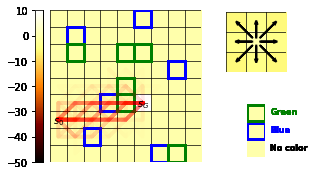

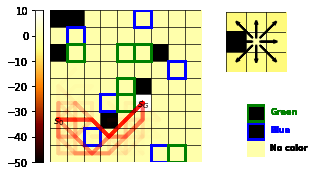

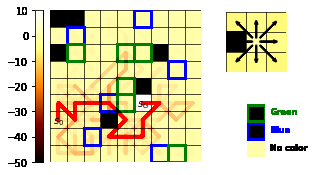

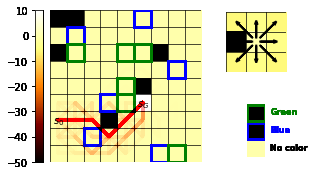

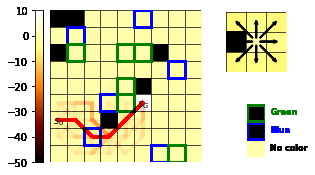

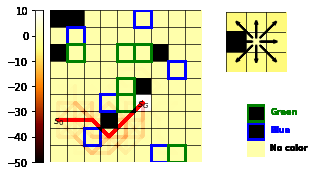

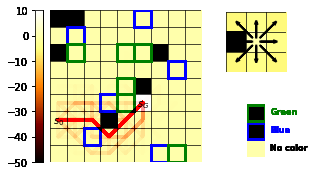

In [6]:
time_tot = int(round(time.time() * 1000))

df = pd.DataFrame()
js_div = pd.DataFrame()
mca = []

for i in range(n_trials):
    #generate constraints
    blue, green, cs, ca, start, goal = generate_constraints(9)
    #constraints = {'blue': blue, 'green': green, 'cs':cs, 'ca':ca}
    
    '''blue = [21,  9, 59,  1,  0, 20]
    green = [42, 18, 76, 41, 23, 30]
    cs = [63, 74, 13, 39, 48, 38]
    ca = [Directions.DOWN_LEFT, Directions.UP_LEFT]
    start =7
    goal = 65'''

    constraints = {'blue': blue, 'green': green, 'cs':cs, 'ca':ca}
    
    #generate nomminal 
    n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal)
    temp_matrix = count_states(demo_n.trajectories, n_cfg.mdp, n, constraints)
    temp_dict=build_dict(temp_matrix, type_mca='nominal')
    df = pd.concat([df, temp_dict])
    
    #generate constrained grid
    cc = [1, 2]
    c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)
    temp_matrix = count_states(demo_c.trajectories, c_cfg.mdp, n, constraints)
    temp_dict=build_dict(temp_matrix, type_mca='const')
    df = pd.concat([df, temp_dict])
    
    mca_s1 = MCA(n=n, c=c, demo=demo_c, only_s1=True)
    demo_mca_s1 = mca_s1.generate_trajectories(n_trajectories)
    temp_matrix_mca_s1 = count_states(demo_mca_s1.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_s1, type_mca='s1', agent=mca_s1, s1_usage=mca_s1.getStatistics()[0])
    f1 = G.plot_world(f'Only S1', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s1, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])
    
    mca_s1_nb = MCA(n=n, c=c, demo=None, only_s1=True)
    demo_mca_s1_nb = mca_s1_nb.generate_trajectories(n_trajectories)
    temp_matrix_mca_s1_nb = count_states(demo_mca_s1_nb.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_s1_nb, type_mca='s1_nb', agent=mca_s1_nb, s1_usage=mca_s1_nb.getStatistics()[0])
    f1 = G.plot_world(f'Only S1', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s1_nb, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])
    
    mca_s2 = MCA(n=n, c=c, demo=None, threshold5=1, only_s2=True)
    demo_mca_s2 = mca_s2.generate_trajectories(n_trajectories)
    temp_matrix_mca_s2 = count_states(demo_mca_s2.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_s2, type_mca='s2', agent=mca_s2 )
    f1 = G.plot_world(f'Only S2', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s2, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])
    
    '''mca_mixed = MCA(n=n, c=c, demo=demo_c, threshold5=1, mixed=True)
    demo_mca_mixed = mca_mixed.generate_trajectories(n_trajectories)
    temp_matrix_mca_mixed = count_states(demo_mca_mixed.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_mixed, type_mca='mixed', agent=mca_mixed, s1_usage=mca_mixed.getStatistics()[0])
    f1 = G.plot_world(f'Mixed', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_mixed, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])'''
    
    '''temp_jsdiv = {}
    temp_jsdiv['t3'] = 0.4
    temp_jsdiv['t4'] = 0
    temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_s1.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s1.modelSelf.ntra_per_transition + 1E-10))
    temp_jsdiv['type'] = 's1'
    temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
    js_div = pd.concat([js_div, temp_jsdiv])
    
    temp_jsdiv = {}
    temp_jsdiv['t3'] = 0.4
    temp_jsdiv['t4'] = 0
    temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_mixed.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_mixed.modelSelf.ntra_per_transition + 1E-10))
    temp_jsdiv['type'] = 'mixed'
    temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
    js_div = pd.concat([js_div, temp_jsdiv])'''
    
    temp_jsdiv = {}
    temp_jsdiv['t3'] = 0.4
    temp_jsdiv['t4'] = 0
    temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_s1_nb.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s1_nb.modelSelf.ntra_per_transition + 1E-10))
    temp_jsdiv['type'] = 'S1'
    temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
    js_div = pd.concat([js_div, temp_jsdiv])
    
    time_exp = int(round(time.time() * 1000))
    #df = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold1 = [10, 50, 100, 200, 300], df=df, bootstrap = bootstrap)
    #df2 = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold2 = [0, 0.2, 0.4, 0.6, 0.8, 1], df = df2, bootstrap = bootstrap)
    
    #df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold3 = 0, df = df, jsdiv=js_div, bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold1=threshold1, threshold3 = 0.4, threshold4 = 0, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    '''df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold3 = 0.4, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold3 = 0.6, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold3 = 0.8, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold3 = 1, df = df, jsdiv=js_div,  bootstrap = bootstrap)'''
    time_exp = int(round(time.time() * 1000)) - time_exp
    print(f"\n {i} #############################################\n")
    '''df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold4 = 0, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold4 = 0.2, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold4 = 0.4, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold4 = 0.6, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold4 = 0.8, df = df, jsdiv=js_div,  bootstrap = bootstrap)
    df, js_div = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold4 = 1, df = df, jsdiv=js_div,  bootstrap = bootstrap)'''
    #df7 = simulation(n_cfg, c_cfg, demo_c, demo_mca_s1, demo_mca_s2, mca_s1, mca_s2, constraints, n_trajectories, threshold7 = [0, 0.2, 0.4, 0.6, 0.8, 1], df = df7, bootstrap = bootstrap)

    #print(f"Varying t1: {time_exp}")

time_tot = int(round(time.time() * 1000)) - time_tot
print(f"Total time: {time_tot}")


In [7]:

'''label='length'
list_df = [df3[label],df4[label]]
list_mean=[(np.mean(x)+np.std(x))*1.1 for x in list_df]

print(np.max(list_mean))
'''
'''def min_max(label, df, df2, df3, df4, df7):
    list_df = [df[label],df2[label],df3[label],df4[label],df7[label]]
    list_mean=[(np.mean(x) + np.sign(np.mean(x)) * np.std(x))*1.1 for x in list_df]
    print(list_mean)
    min_label=np.min(list_mean)
    max_label=np.max(list_mean)
    
    if min_label < 0 and max_label < 0:
        max_label = 0
    elif min_label > 0 and max_label > 0:
        min_label = 0
    
    return min_label, max_label'''

def min_max(label, df):
    list_df = df[label]
    list_mean=[(np.mean(x) + np.sign(np.mean(x)) * np.std(x))*1.1 for x in list_df]
    #print(list_mean)
    min_label=np.min(list_mean)
    max_label=np.max(list_mean)
    
    if min_label < 0 and max_label < 0:
        max_label = 0
    elif min_label > 0 and max_label > 0:
        min_label = 0
    
    return min_label, max_label

In [8]:
temp_df = df.loc[(df['type']=='s1_nb')]['time'].values
for x in temp_df:
    print(x)

0
0
5
5
5
5
12
12
72
72
1
1
1
1
2
2
3
3
1
1
1
1
1
1
2
2
3
3
2
2
2
2
3
3
3
3
3
3
1
1
2
2
1
1
23
23
2
2
2
2
3
3
1
1
1
1
2
2
3
3
2
2
2
2
1
1
2
2
2
2
6
6
1
1
1
1
2
2
4
4
1
1
1
1
2
2
3
3
2
2
2
2
3
3
2
2
82
82
1
1
3
3
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
3
3
2
2
2
2
3
3
1
1
1
1
2
2
2
2
3
3
1
1
2
2
4
4
1
1
2
2
1
1
2
2
3
3
2
2
2
2
2
2
1
1
1
1
2
2
2
2
2
2
2
2
1
1
2
2
2
2
3
3
2
2
3
3
1
1
2
2
2
2
2
2
4
4
2
2
2
2
6
6
2
2
2
2
2
2
1
1
2
2
3
3
1
1
1
1
14
14
2
2
2
2
2
2
2
2
2
2
2
2
6
6
2
2
2
2
3
3
2
2
4
4
1
1
2
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
3
3
2
2
2
2
2
2
4
4
2
2
2
2
2
2
3
3
2
2
2
2
1
1
3
3
2
2
2
2
2
2
3
3
1
1
2
2
2
2
3
3
2
2
3
3
3
3
2
2
1
1
2
2
3
3
3
3
1
1
2
2
3
3
1
1
3
3
1
1
2
2
3
3
2
2
2
2
1
1
2
2
1
1
2
2
0
0
2
2
2
2
1
1
1
1
3
3
2
2
2
2
2
2
5
5
2
2
2
2
2
2
3
3
8
8
2
2
3
3
3
3
2
2
2
2
1
1
5
5
3
3
3
3
2
2
2
2
1
1
2
2
2
2
2
2
2
2
3
3
2
2
5
5
1
1
3
3
2
2
3
3
7
7
2
2
1
1
5
5
5
5
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
3
3
3
3
3
3
3
3
2
2
1
1
3
3
2
2
2
2
3
3
3
3
2
2
3
3
1
1
4
4
2
2
1
1
4
4
3
3
2
2
2
2
2


158
37
37
292
292
119
119
21
21
48
48
17
17
42
42
19
19
134
134
14
14
133
133
37
37
102
102
62
62
97
97
324
324
152
152
82
82
258
258
107
107
278
278
82
82
168
168
74
74
309
309
207
207
267
267
38
38
219
219
184
184
136
136
125
125
137
137
126
126
103
103
68
68
398
398
232
232
580
580
108
108
200
200
48
48
43
43
130
130
171
171
123
123
27
27
74
74
17
17
215
215
93
93
79
79
53
53
82
82
20
20
42
42
31
31
32
32
120
120
301
301
181
181
42
42
239
239
70
70
173
173
227
227
364
364
93
93
79
79
188
188
62
62
241
241
160
160
91
91
224
224
280
280
427
427
191
191
87
87
181
181
175
175
220
220
120
120
128
128
67
67
52
52
136
136
116
116
171
171
72
72
124
124
215
215
36
36
254
254
295
295
287
287
69
69
194
194
182
182
44
44
100
100
55
55
194
194
130
130
279
279
200
200
73
73
196
196
397
397
80
80
239
239
140
140
114
114
228
228
258
258
35
35
113
113
504
504
90
90
324
324
417
417
83
83
239
239
238
238
315
315
135
135
246
246
25
25
99
99
229
229
20
20
82
82
298
298
35
35
197
197
56
56
184
184
302
30

29
29
89
89
20
20
151
151
8
8
26
26
13
13
49
49
70
70
61
61
33
33
6
6
22
22
81
81
8
8
89
89
13
13
44
44
6
6
64
64
17
17
23
23
28
28
27
27
32
32
69
69
50
50
42
42
101
101
34
34
80
80
31
31
8
8
59
59
25
25
48
48
29
29
39
39
9
9
132
132
27
27
33
33
130
130
31
31
16
16
26
26
41
41
23
23
9
9
21
21
7
7
8
8
7
7
34
34
25
25
40
40
32
32
30
30
28
28
44
44
18
18
37
37
33
33
29
29
17
17
23
23
20
20
20
20
6
6
29
29
86
86
40
40
96
96
61
61
18
18
33
33
37
37
5
5
126
126
11
11
13
13
5
5
22
22
29
29
7
7
17
17
43
43
43
43
62
62
10
10
42
42
38
38
11
11
21
21
46
46
49
49
24
24
10
10
65
65
51
51
8
8
18
18
25
25
7
7
37
37
46
46
17
17
11
11
54
54
82
82
70
70
117
117
9
9
7
7
9
9
12
12
24
24
35
35
6
6
9
9
53
53
44
44
108
108
23
23
8
8
68
68
58
58
84
84
20
20
12
12
91
91
43
43
79
79
39
39
37
37
124
124
26
26
84
84
25
25
12
12
62
62
10
10
41
41
21
21
60
60
106
106
58
58
54
54
63
63
18
18
47
47
33
33
14
14
123
123
22
22
6
6
65
65
20
20
87
87
108
108
116
116
42
42
32
32
23
23
81
81
28
28
105
105
31
31
24
24
23
23


142
142
149
149
61
61
62
62
23
23
181
181
173
173
85
85
105
105
134
134
26
26
107
107
148
148
97
97
146
146
93
93
77
77
126
126
118
118
83
83
65
65
98
98
139
139
98
98
120
120
41
41
67
67
115
115
75
75
84
84
91
91
67
67
84
84
127
127
40
40
125
125
79
79
95
95
81
81
161
161
200
200
93
93
74
74
153
153
116
116
96
96
187
187
88
88
179
179
108
108
153
153
204
204
77
77
65
65
184
184
199
199
83
83
74
74
161
161
98
98
97
97
59
59
182
182
151
151
151
151
143
143
220
220
48
48
141
141
114
114
80
80
117
117
113
113
106
106
165
165
58
58
157
157
194
194
176
176
131
131
126
126
164
164
71
71
259
259
115
115
246
246
151
151
218
218
218
218
81
81
149
149
125
125
240
240
137
137
80
80
104
104
37
37
163
163
114
114
150
150
214
214
72
72
161
161
25
25
106
106
145
145
65
65
158
158
77
77
212
212
101
101
208
208
87
87
290
290
148
148
170
170
124
124
200
200
306
306
159
159
100
100
195
195
202
202
122
122
174
174
177
177
137
137
195
195
253
253
114
114
163
163
126
126
71
71
161
161
178
178
264
264
34
34


653
238
238
86
86
34
34
25
25
293
293
39
39
11
11
521
521
24
24
201
201
30
30
129
129
75
75
602
602
7
7
22
22
215
215
43
43
194
194
361
361
27
27
45
45
70
70
274
274
6
6
78
78
7
7
4
4
8
8
127
127
97
97
159
159
50
50
128
128
265
265
87
87
335
335
70
70
30
30
59
59
191
191
40
40
34
34
35
35
69
69
21
21
153
153
401
401
38
38
458
458
266
266
312
312
433
433
178
178
45
45
106
106
305
305
122
122
383
383
133
133
302
302
368
368
385
385
139
139
5
5
163
163
146
146
18
18
472
472
34
34
178
178
118
118
106
106
191
191
103
103
6
6
164
164
342
342
385
385
55
55
118
118
594
594
552
552
531
531
27
27
87
87
31
31
764
764
179
179
71
71
9
9
220
220
160
160
102
102
14
14
157
157
495
495
51
51
81
81
121
121
89
89
15
15
248
248
99
99
366
366
108
108
15
15
72
72
102
102
186
186
18
18
435
435
279
279
104
104
72
72
311
311
145
145
150
150
401
401
298
298
374
374
53
53
85
85
241
241
185
185
463
463
205
205
13
13
203
203
138
138
73
73
78
78
291
291
387
387
219
219
27
27
148
148
668
668
605
605
100
100
27
27
85

Prima
Dopo
constrained_line: 6.9704999999999995 length
nominal_line: 5.2170000000000005 length
s2: 6.2531 s1:48.1504


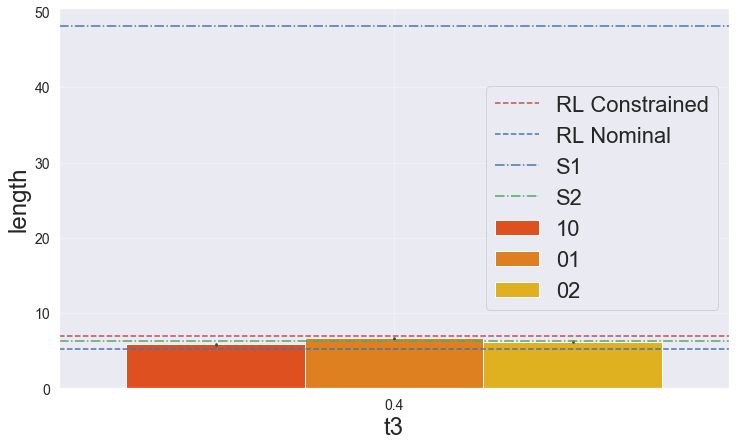

Prima
Dopo
constrained_line: -27.75023750296042 reward
nominal_line: -14.332482235688602 reward
s2: -25.10824425696042 s1:-874.4823349780995


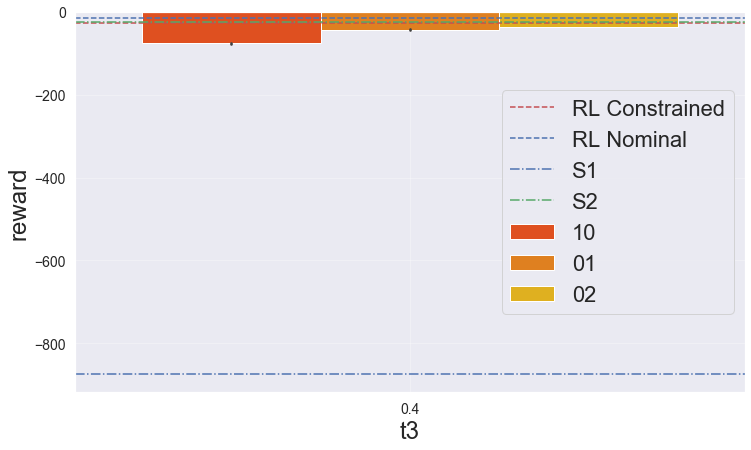

ok
Prima
Dopo
constrained_line: 0.0 time
nominal_line: 0.0 time
s2: 126.0328 s1:87.7407


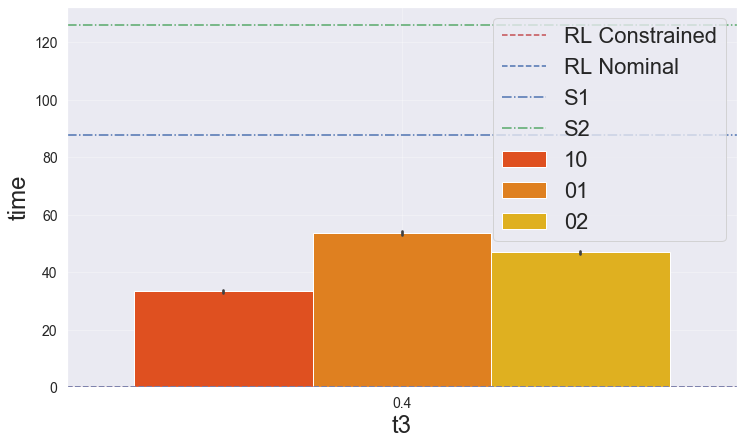

In [9]:
temp_df = df.loc[(df['traj_n']>=0) & (df['t3']==0.4) | (df['type']=='s1_nb') | (df['type']=='s2') | (df['type']=='nominal')| (df['type']=='const')]

label_x = 't3'
label='length'
min_label, max_label = min_max(label, df)
plot_results(temp_df,x=label_x,y=label, min_label=min_label, max_label=max_label)

label='reward'
min_label, max_label = min_max(label, df)
plot_results(temp_df,x=label_x,y=label, min_label=min_label, max_label=max_label)

label='time'
min_label, max_label = min_max(label, df)
print("ok")
plot_results(df,x=label_x,y=label, min_label=min_label, max_label=max_label)

#label='S1_Usage'
#min_label, max_label = min_max(label, df, df2, df3, df4, df7)
#plot_results(df3,x=label_x,y=label, min_label=min_label, max_label=max_label)

Prima
Dopo
constrained_line: nan length
nominal_line: nan length
s2: nan s1:nan


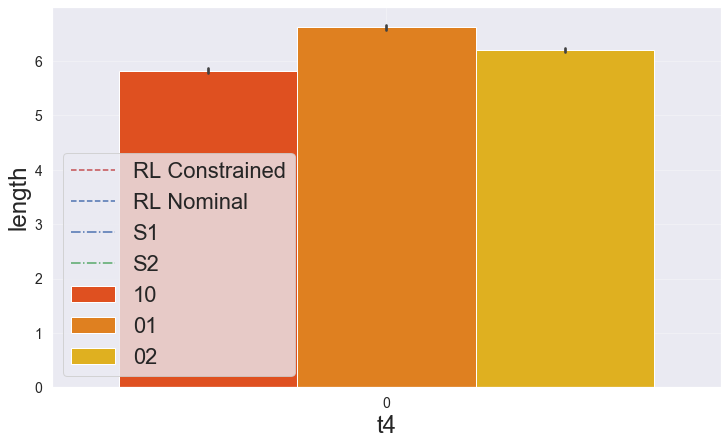

Prima
Dopo
constrained_line: nan reward
nominal_line: nan reward
s2: nan s1:nan


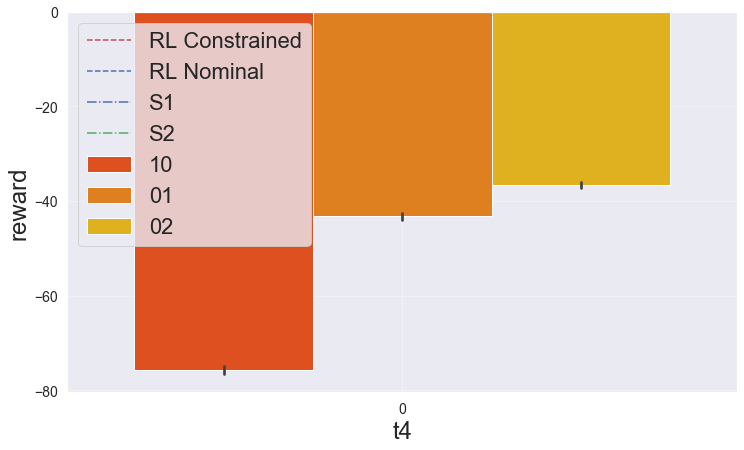

Prima
Dopo
constrained_line: 0.0 time
nominal_line: 0.0 time
s2: 126.0328 s1:87.7407


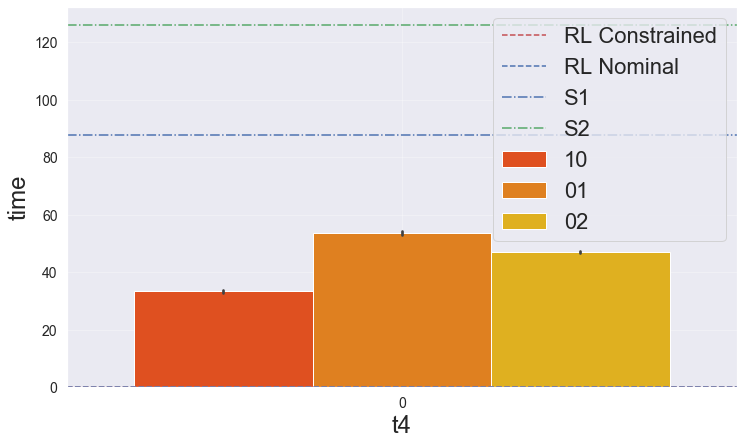

"label='Viol'\nmin_label, max_label = min_max(label, df, df2, df3, df4, df7)\nplot_results(df4,x=label_x,y=label, min_label=min_label, max_label=max_label)\n\nlabel='S1_Usage'\nmin_label, max_label = min_max(label, df, df2, df3, df4, df7)\nplot_results(df4,x=label_x,y=label, min_label=min_label, max_label=max_label)\n\nlabel='avg_time_s1'\nmin_label, max_label = min_max(label, df, df2, df3, df4, df7)\nplot_results(df4,x=label_x,y=label, min_label=min_label, max_label=max_label)"

In [10]:
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0.4)]

label_x = 't4'
label='length'
min_label, max_label = min_max(label, df)
plot_results(temp_df,x=label_x,y=label, min_label=min_label, max_label=max_label)

label='reward'
min_label, max_label = min_max(label, df)
plot_results(temp_df,x=label_x,y=label, min_label=min_label, max_label=max_label)

label='time'
min_label, max_label = min_max(label, df)
plot_results(df,x=label_x,y=label, min_label=min_label, max_label=max_label)

'''label='Viol'
min_label, max_label = min_max(label, df, df2, df3, df4, df7)
plot_results(df4,x=label_x,y=label, min_label=min_label, max_label=max_label)

label='S1_Usage'
min_label, max_label = min_max(label, df, df2, df3, df4, df7)
plot_results(df4,x=label_x,y=label, min_label=min_label, max_label=max_label)

label='avg_time_s1'
min_label, max_label = min_max(label, df, df2, df3, df4, df7)
plot_results(df4,x=label_x,y=label, min_label=min_label, max_label=max_label)'''

In [11]:
df3.loc[(df3['type']=='02') & (df3['t3']==0.4)& (df3['t4']==0)]

KeyError: 'type'

In [ ]:
#df.loc[(df['type']=='02') & (df['t1']==200)]


df = df3
plt.figure(figsize=(12, 7))
plt.plot(df.loc[(df['type']=='02') & (df['t3']==0.4)& (df['t4']==0)]['usage_s1'].values, label="S1")
plt.plot(df.loc[(df['type']=='02') & (df['t3']==0.4)& (df['t4']==0)]['usage_s2'].values, label="S2")
plt.title("Percentage of time")
plt.legend()
plt.show()

In [ ]:
def print_results(df, type_agent):
    print(f"{type_agent}: -> Length: {np.mean(df['length']):6.2f} \
 ({np.mean(df.loc[(df['sub_type']=='s1')]['usage']):6.2f} ; {np.mean(df.loc[(df['sub_type']=='s2')]['usage']):6.2f}) \
 Rew: {np.mean(df['reward']):10.4f} ({np.nanmean(df.loc[(df['sub_type']=='s1')]['avg_reward']):6.2f} ; {np.nanmean(df.loc[(df['sub_type']=='s2')]['avg_reward']):6.2f}) \
 Time: {np.mean(df['time']):10.4f} ({np.mean(df.loc[(df['sub_type']=='s1')]['avg_time']):6.4f} ; {np.mean(df.loc[(df['sub_type']=='s2')]['avg_time']):6.4f})")

#df3.loc[(df3['traj_n']>=0) & (df3['t4']==0) & (df3['t3']==0.4) & (df3['type']=='const')]
temp_df = df.loc[df['type']=='const']
print_results(temp_df,'RL')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0.4) & (df['t4']==0) & (df['type']=='10')]
print_results(temp_df,'MCA 10')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0.4) & (df['t4']==0) & (df['type']=='01')]
print_results(temp_df,'MCA 01')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0.4) & (df['t4']==0) & (df['type']=='02')]
print_results(temp_df,'MCA 55')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0) & (df['t4']==0) & (df['type']=='s1')]
print_results(temp_df,'Only S1')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0) & (df['t4']==0) & (df['type']=='s2')]
print_results(temp_df,'Only S2')
temp_df = df.loc[(df['traj_n']<bootstrap) & (df['t3']==0) & (df['t4']==0) & (df['type']=='mixed')]
print_results(temp_df,'Mix Bef')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0) & (df['t4']==0) & (df['type']=='mixed')]
print_results(temp_df,'Mix Aft')


temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['t3']==0.4) & (df['t4']==0) & (df['type']=='10')]
temp_df


In [12]:
df.to_csv("dati_new_10grid_t1_100.csv")
js_div.to_csv("jsdiv_new_10grid_t1_100.csv")
#pd.read_csv("dati_new_10grid_t1_100.csv")

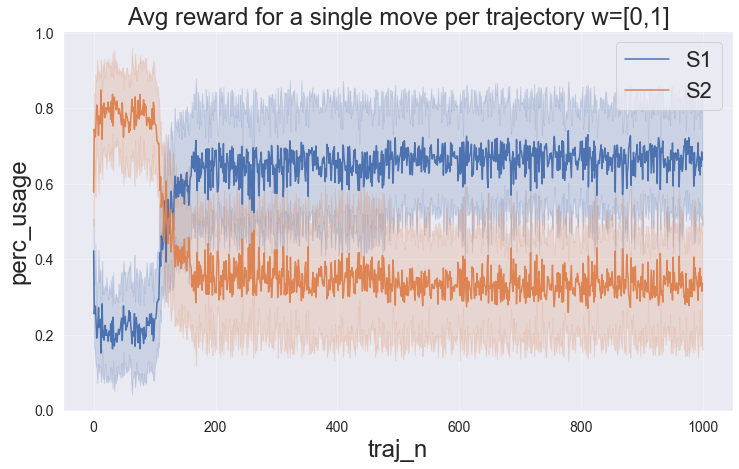

In [13]:
#temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='s1_nb') | (df['type']=='s2')| (df['type']=='01')| (df['type']=='10')| (df['type']=='02'))]
temp_df = df.loc[(df['traj_n']>=0) & ((df['type']=='01') )  ] #| (df['type']=='s1_nb') 

x='traj_n'
y='perc_usage'


fig=plt.figure(figsize=(12, 7))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
sns.color_palette("viridis", as_cmap=True)#
g=sns.lineplot(x=x, y=y, data=temp_df, hue="sub_type",markers=True, dashes=False)
#g=sns.scatterplot(x=x, y=y, data=temp_df, hue="sub_type",markers=True)
#g = sns.barplot(x=x, y=y, hue="type", data=temp_df.loc[(temp_df['type']!="const")& (temp_df['type']!="s1") & (temp_df['type']!="s2")& (temp_df['traj_n']>=bootstrap)], palette="autumn", ci=95);
#g.set_xticklabels([f"({(i)/10:0.1f}, {1 - (i)/10:0.1f})" for i in range(11)])

#constrained_line = np.median(df.loc[(df['type']=="const")][y])
#s1_line = np.median(temp_df.loc[(temp_df['type']=="s1")& (temp_df['traj_n']>=bootstrap)][y])
#s2_line = np.median(temp_df.loc[(temp_df['type']=="s2")& (temp_df['traj_n']>=bootstrap)][y])

#g.axhline(constrained_line, color='r', linestyle='--', label="RL")
#g.axhline(s1_line, color='b', linestyle='--', label="S1")

#g.axhline(s2_line, color='g', linestyle='-.', label="S2")
#g.set_ylim([0, 40])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label="Avg reward for a single move per trajectory w=[0,1]")

h, l = g.get_legend_handles_labels()
#labels=["S2","SOFAI 01"]
labels=["S1","S2"]
g.legend(h, labels)

#plt.legend()
plt.grid(alpha=0.3)
#g.set_xticks(range(11)) # <--- set the ticks first

#plt.xlabel("W(Nominal, Constraints)")
#plt.ylabel("Avg JS dist")
plt.show()

In [ ]:
df.loc[(df['traj_n']>=0) & ((df['type']=='nominal') )  ]
y='length'
np.mean(df.loc[(df['type']=="nominal")][y])

In [ ]:
temp_df = js_div.loc[((js_div['t3']==0.4) & (js_div['t4']==0)) | (js_div['type']=='s1_nb')]

y='jsdiv'


fig=plt.figure(figsize=(12, 7))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
sns.color_palette("viridis", as_cmap=True)
#sns.relplot(x="i", y="avg_vc", hue="type", kind="line", ci="sd", data=df);
#g=sns.relplot(x="i", y=[i[0] for i in df['avg_js_dist']],  kind="line", data=df, palette="Greens", height=7, aspect=2);
#g=sns.lineplot(x="t4", y='jsdiv', data=temp_df, hue="type",markers=True, dashes=False)
g = sns.barplot(x='t3', y=y, hue="type", data=temp_df, palette="autumn", ci=95);
#g.set_xticklabels([f"({(i)/10:0.1f}, {1 - (i)/10:0.1f})" for i in range(11)])

h, l = g.get_legend_handles_labels()
labels=['S1',"SOFAI 01","SOFAI 10","SOFAI 02"]
g.legend(h, labels)

#g.set_xticklabels([f"({(i)/10:0.1f}, {1 - (i)/10:0.1f})" for i in range(11)])

#mixed_line = js_div.loc[js_div['type']=='mixed']['jsdiv'].values
#g.axhline(mixed_line, color='r', linestyle='--', label="Mixed")

#mixed_line = js_div.loc[js_div['type']=='s1_nb']['jsdiv'].values
#g.axhline(mixed_line, color='b', linestyle='--', label="S1_NB")

#plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#g.set_xticks(range(11)) # <--- set the ticks first

plt.xlabel("t3")
plt.ylabel("JS div")
plt.title("JS Divergence")
plt.show()
#fig.savefig(os.path.join(save_path, f"avg_js_dist.png"), bbox_inches = 'tight') 

In [ ]:
threshold1